In [1]:
from multiprocessing import Pool
from collections import Counter
import matplotlib.pyplot as plt
import networkx as nx
from tqdm import tqdm
import pandas as pd
import numpy as np
#import import_ipynb
import itertools
import json
import sys

In [2]:
from metric_util_func_py import *

In [3]:
%matplotlib inline

In [4]:
folder="../dataset_v5/v5_2/"

In [5]:
save_dir = "graphs_v5_2_7_2"

In [51]:
mod_ment2 = pd.read_csv(folder+'v5_2_2/'+'final_shodhganga_dataset_v5_2_7_2.csv', sep =",")

In [52]:
mod_ment2.columns

Index(['advisorId', 'researcherId', 'advId', 'resId', 'advisor_name',
       'researcher_name', 'publisher_dept', 'DepartmentId',
       'publisher_institution', 'instituteId', 'title', 'thesisId',
       'N_thesisId', 'date_submitted', 'new_date_awarded', 'dc.date.awarded',
       'dc.subject.ddc', 'uniq_ddc_across_dept', 'dc.description.abstract',
       'dc.title.alternative', 'N_DepartmentId_1', 'ddc_code', 'advisor_advId',
       'researcher_resId'],
      dtype='object')

In [53]:
mod_ment2.shape

(201477, 24)

In [54]:
mod_ment2['new_date_awarded']= mod_ment2['new_date_awarded'].fillna("2019-05-01")

In [55]:
mod_ment2['new_date_awarded']=pd.to_datetime(mod_ment2['new_date_awarded'],errors='coerce')

In [39]:
#mod_ment2 = mod_ment2.set_index('new_date_awarded')

In [38]:
#df_filter=mod_ment2.loc["2019-04-01":"2020-01-01"].copy()

In [37]:
#df_filter.shape

In [71]:
#df_filter[df_filter["instituteId"]=="I364"].shape

In [72]:
#df_filter[df_filter["instituteId"]=="I26"].shape

In [10]:
# mod_ment2 = mod_ment2.set_index('new_date_awarded')
# df_filter=mod_ment2.loc[:"1940-01-01"].copy()

In [11]:
# df_filter[df_filter['instituteId']=='I89']['title'].values

In [12]:
# df_filter

In [40]:
inx_to_inst=dict(zip(mod_ment2.instituteId,mod_ment2.publisher_institution))

In [41]:
#inx_to_inst

In [42]:
important_labels = {
'Gauhati University':'GU',
'Aligarh Muslim University':"AMU",
'Karnatak University':"KU",
'Gujarat University': 'GUJU',
'Mahatma Gandhi University':'MGU',
'Utkal University':'UTU',
'Kuvempu University':'KUU',
'Sardar Patel University':'SPU',
'Jamia Milia Islamia University':'JMIU',
'University of Hyderabad':'UOH',
'Savitribai Phule Pune University':'SPPU',
'University of Calcutta':'UOC',
'Panjab University':'PU',
'Maharaja Sayajirao University of Baroda':'MSUOB',
'Dr. Harisingh Gour Vishwavidyalaya':'HGV',
'University of Kerala':'UOK',
'Jawaharlal Nehru University':'JNU',
'Dr. Babasaheb Ambedkar Marathwada University':'BAMU',
'Anna University':'AU',
'V. B. S. Purvanchal University':'VBSPU',
'University of Mysore':'UOMY',                              
'Bharathiar University':'BU',
'Bharathidasan University':'BHAU',
'Maharshi Dayanand University':'MDU',
'Shivaji University':'SU',
'Manonmaniam Sundaranar University':'MSU',
'Sri Krishnadevaraya University':'SKU',
'University of Madras':'UOM',}

In [43]:
labels = list(important_labels.items())

In [44]:
df = pd.DataFrame(labels)

In [45]:
print(df.to_latex())

\begin{tabular}{lll}
\toprule
{} &                                             0 &      1 \\
\midrule
0  &                            Gauhati University &     GU \\
1  &                     Aligarh Muslim University &    AMU \\
2  &                           Karnatak University &     KU \\
3  &                            Gujarat University &   GUJU \\
4  &                     Mahatma Gandhi University &    MGU \\
5  &                              Utkal University &    UTU \\
6  &                            Kuvempu University &    KUU \\
7  &                       Sardar Patel University &    SPU \\
8  &                Jamia Milia Islamia University &   JMIU \\
9  &                       University of Hyderabad &    UOH \\
10 &              Savitribai Phule Pune University &   SPPU \\
11 &                        University of Calcutta &    UOC \\
12 &                             Panjab University &     PU \\
13 &       Maharaja Sayajirao University of Baroda &  MSUOB \\
14 &            

In [46]:
mod_inx_to_inst = {key:important_labels[key1] for key1 in important_labels for key in inx_to_inst if inx_to_inst[key]==key1}

In [47]:
#mod_inx_to_inst

In [48]:
# graph1 = nx.convert_matrix.from_pandas_edgelist(mod_ment2, 'advId','resId','instituteId', create_using=nx.DiGraph())
# graph1.remove_edges_from(nx.selfloop_edges(graph1))
# cycle=list(nx.simple_cycles(graph1))
# graph1.remove_edges_from(cycle)

In [49]:
#ax=draw_rank_heatmap()

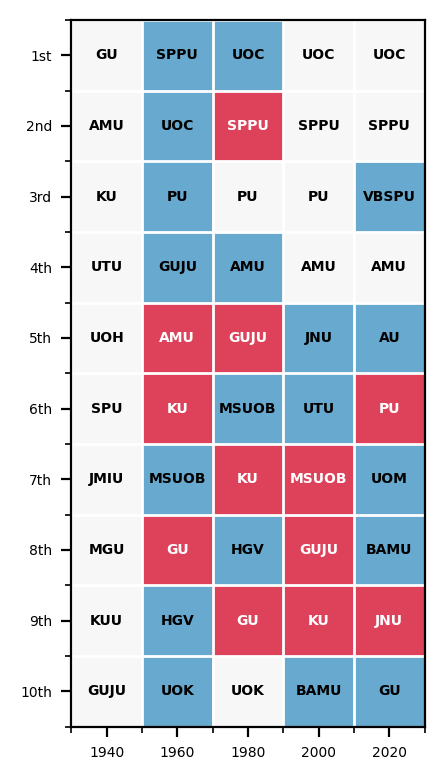

In [56]:
ax=draw_rank_heatmap2(df=mod_ment2, inx_to_inst=mod_inx_to_inst,func1=Counter, func2=thesis_advised_cumlative, metric=0, title="")
fig=ax.get_figure()#Change in institute rank (based on thesis advised) over time
#fig.savefig('graphs/inst_rank_heatmap_with_thesis.png',bbox_inches='tight')
fig.savefig('../'+save_dir+'/inst_rank_heatmap_with_thesis_last_all_included.pdf',bbox_inches='tight')
# 14455 records missing date field, Based On thesis advised

In [ ]:
'''last_all_included meaning: included all thesis with missing date in last column of the grid 
that is thesis graduated before "2020-01-01"'''

In [50]:
#fig2=ax.get_figure()

In [51]:
#fig2.savefig('inst_rank1.png',bbox_inches='tight')

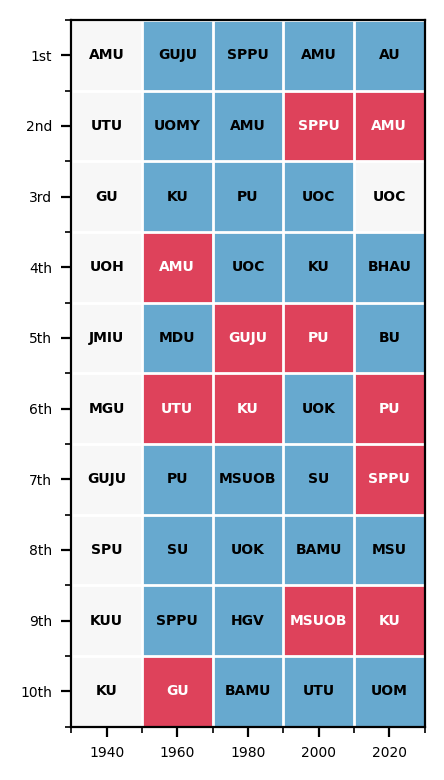

In [57]:
ax1 = draw_rank_heatmap2(df=mod_ment2, inx_to_inst=mod_inx_to_inst, from_y=1940, to_y=2020, step_size=20, func1=inst_wise_val, func2=other_metrics1, metric=2, title="")#Change in institute rank (based on fertility value) over time
fig1=ax1.get_figure()
#fig1.savefig('graphs/inst_rank_heatmap_with_fertility.png', bbox_inches='tight')
fig1.savefig('../'+save_dir+'/inst_rank_heatmap_with_fertility_last_all_included.pdf', bbox_inches='tight')

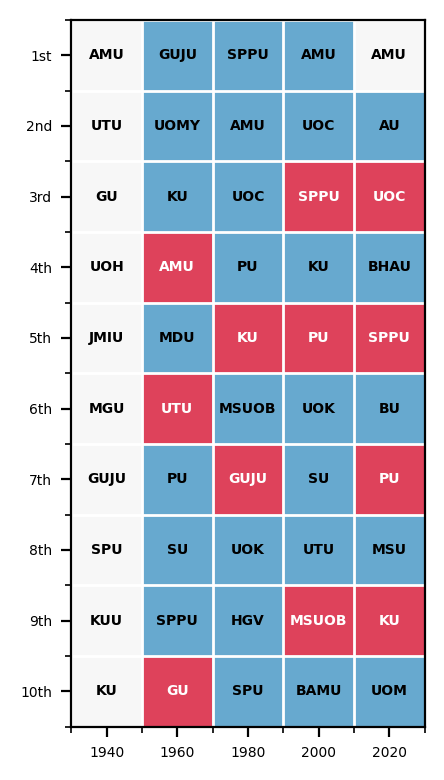

In [58]:
ax2 = draw_rank_heatmap2(df=mod_ment2, inx_to_inst=mod_inx_to_inst, from_y=1940, to_y=2020, step_size=20, func1=inst_wise_val, func2=other_metrics1, metric=3, title="")#Change in institute rank (based on h-index value) over time
fig2=ax2.get_figure()
#fig2.savefig('graphs/inst_rank_heatmap_with_hindex.png', bbox_inches='tight')
fig2.savefig('../'+save_dir+'/inst_rank_heatmap_with_hindex_last_all_included.pdf', bbox_inches='tight')

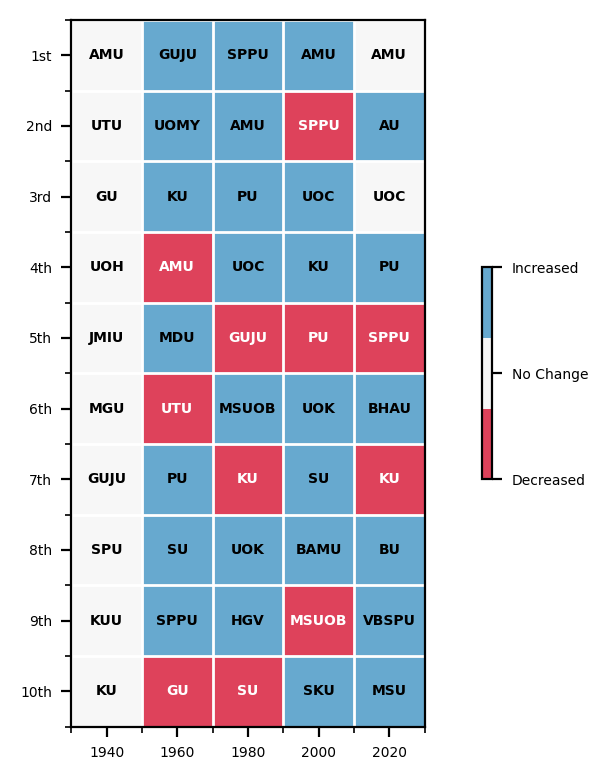

In [59]:
ax3 = draw_rank_heatmap1(df=mod_ment2, inx_to_inst=mod_inx_to_inst, from_y=1940, to_y=2020, step_size=20, func1=inst_wise_val, func2=other_metrics1, metric=4, title="")#Change in institute rank (based on g_index value) over time
fig3=ax3.get_figure()
#fig3.savefig('graphs/inst_rank_heatmap_with_g_index.png',bbox_inches='tight')
fig3.savefig('../'+save_dir+'/inst_rank_heatmap_with_g_index_last_all_included.pdf',bbox_inches='tight')

In [24]:
#len(set(inx_to_inst.values()))

[3, 20, 20, 20, 23, 34, 452, 3084, 10163, 24707, 48594, 96575, 191851]
[1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]


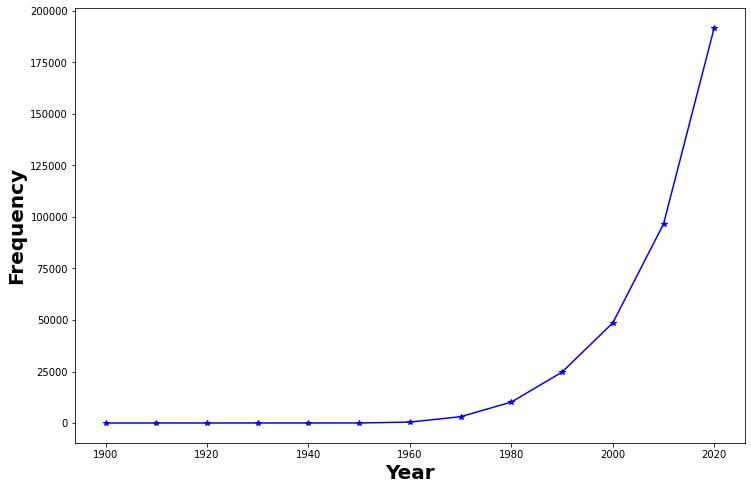

In [61]:
stud = student_produced_over_time(df=mod_ment2)

[3, 20, 20, 20, 23, 34, 450, 3068, 10089, 24461, 47929, 94844, 174551]
[1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]


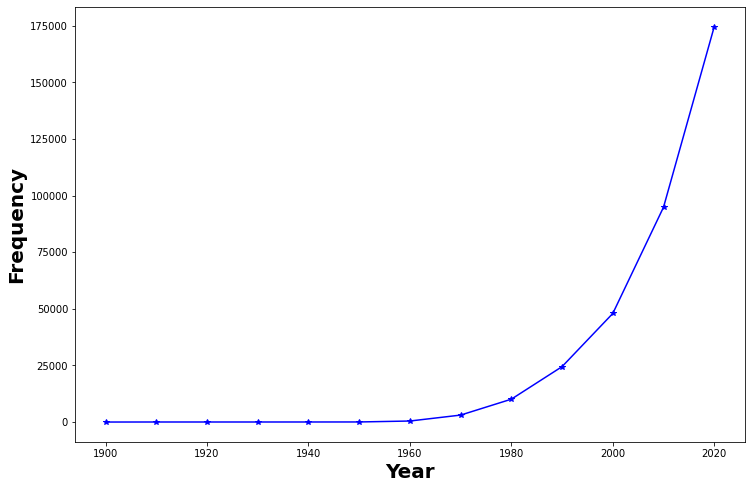

In [9]:
stud = student_produced_over_time(df=mod_ment2)

In [26]:
#stud1 = student_produced_over_time(df=mod_ment2,st_year=1951, end_year=2017, interval_size=5)

In [63]:
# student = [3, 20, 20, 20, 23, 34, 450, 3068, 10089, 24461, 47929, 94844, 174551]
# over_time =  [1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
# inst1 = [3, 8, 8, 8, 10, 12, 23, 38, 50, 62, 76, 162, 359]
# time1 = [1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
# previous results

In [66]:
student= [3, 20, 20, 20, 23, 34, 452, 3084, 10163, 24707, 48594, 96575, 191851]
over_time =  [1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
inst1= [3, 8, 8, 8, 10, 12, 23, 38, 50, 62, 76, 162, 367]
time1 = [1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]

In [67]:
#np.log2(student)

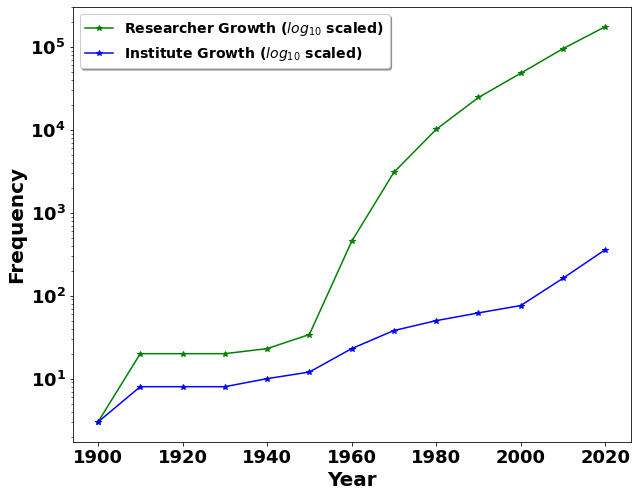

In [8]:
# fig, ax = plt.subplots(figsize=(10,8))
# plt.plot(over_time, student, color="g",marker="*", label = 'Researcher Growth ($log_{10}$ scaled)')
# plt.plot(over_time, inst1 , color="b",marker="*", label  = 'Institute Growth ($log_{10}$ scaled)')
# plt.yticks(fontsize=18, fontweight='bold')
# plt.xticks(fontsize=18, fontweight='bold')
# plt.title("", fontsize=12)#No. of Researcher Graduated over time
# plt.ylabel("Frequency", fontsize=20,fontweight='bold')
# plt.xlabel("Year", fontsize=20,fontweight='bold')
# ax.set_yscale('log')
# plt.legend(fancybox=True, shadow=True,prop={"weight":'bold',"size":14})
# plt.savefig('../'+save_dir+'/comb_thesis_inst_distribution_over_time.pdf',bbox_inches='tight')
# plt.show()

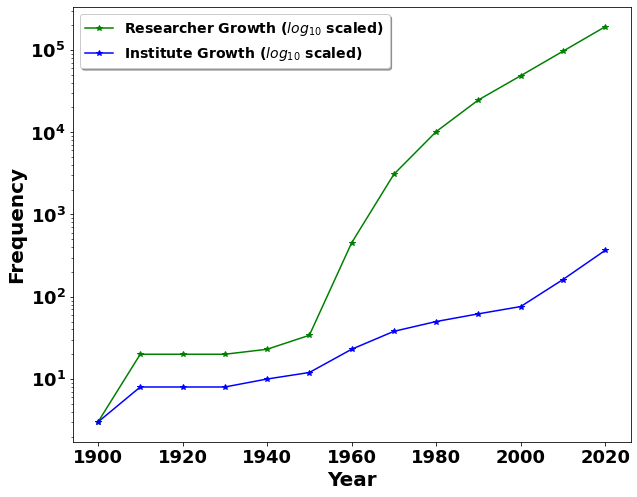

In [68]:
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(over_time, student, color="g",marker="*", label = 'Researcher Growth ($log_{10}$ scaled)')
plt.plot(over_time, inst1 , color="b",marker="*", label  = 'Institute Growth ($log_{10}$ scaled)')
plt.yticks(fontsize=18, fontweight='bold')
plt.xticks(fontsize=18, fontweight='bold')
plt.title("", fontsize=12)#No. of Researcher Graduated over time
plt.ylabel("Frequency", fontsize=20,fontweight='bold')
plt.xlabel("Year", fontsize=20,fontweight='bold')
ax.set_yscale('log')
plt.legend(fancybox=True, shadow=True,prop={"weight":'bold',"size":14})
plt.savefig('../'+save_dir+'/comb_thesis_inst_distribution_over_time_last_all_included.pdf',bbox_inches='tight')
plt.show()

[3, 8, 8, 8, 10, 12, 23, 38, 50, 62, 76, 162, 367]
[1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]


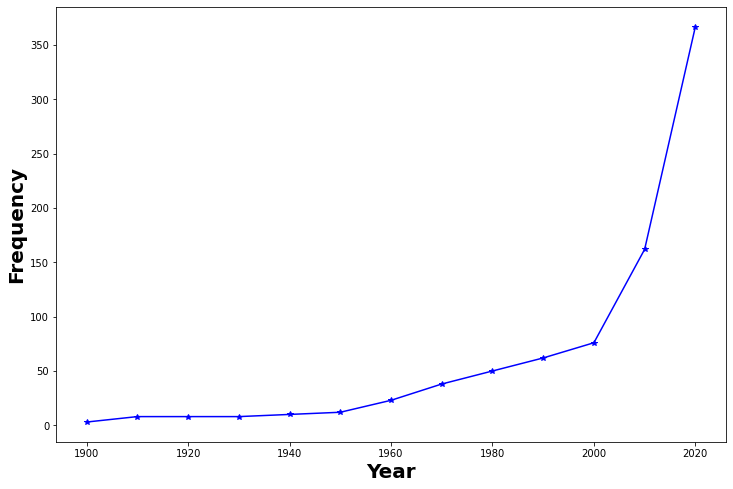

In [62]:
inst = inst_increase_over_time(df=mod_ment2)

In [ ]:
#inst1 = inst_increase_over_time(df=mod_ment2,st_year=1951, end_year=2017, interval_size=5)

In [ ]:
#mod_ment2['new_date_awarded'].isnull().sum()

In [ ]:
#pd.unique(mod_ment2['N_thesisId']).shape

In [ ]:
#exp = mod_ment2.drop_duplicates(subset='N_thesisId', keep="last").copy()

In [ ]:
#exp.shape

In [ ]:
#exp['new_date_awarded'].isnull().sum()

In [ ]:
#mod_ment2.sample(10)['title'].values

In [ ]:
#inx_to_inst#I87,I203,I292

In [ ]:
#mod_ment2.columns

In [ ]:
#mod_ment2[mod_ment2['instituteId']=='I87'].isnull().sum()#punjab

In [ ]:
#mod_ment2[mod_ment2['instituteId']=='I292'].isnull().sum()#I250

In [ ]:
#mod_ment2[mod_ment2['instituteId']=='I250'].isnull().sum()#I364

In [ ]:
#mod_ment2[mod_ment2['instituteId']=='I364'].isnull().sum()#I364